#### EDA for Scottish Hydro Electric Power Distribution (SHEPD)
##### Neil Martin

<p> This EDA focuses on the SHEPD dataset of the SSEN electricity network and attempts to identify patterns of outages against historical weather data </p>

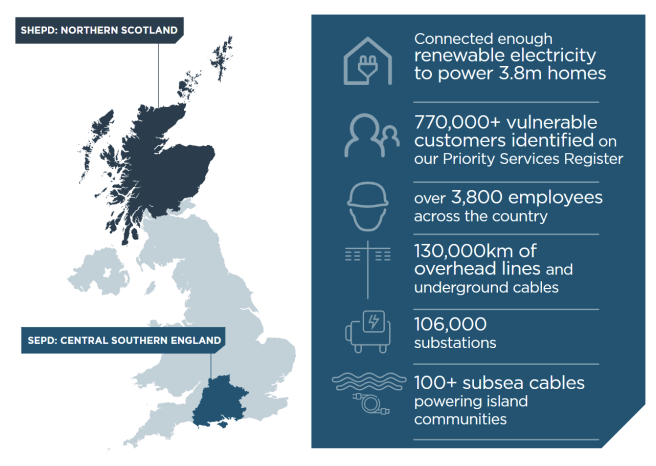